In [172]:
import pandas as pd
import numpy as np

In [174]:
posts = pd.read_csv("Posts_Table_with_user_id.csv")
categories = {

    "Travel & Nature": [
        "travel", "nature", "landscape", "adventure", "wildlife",
        "mountains", "beach", "sunset", "sunrise", "camping", "hiking",
        "wanderlust", "traveldiaries", "travelphotography", "naturelover",
        "travelgram", "backpacking", "explore", "vacation", "trekking",
        "waterfall", "roadtrip", "forest", "naturephotography"
    ],

    "Fashion & Beauty": [
        "fashion", "streetwear", "beauty", "makeup", "skincare",
        "lifestyle", "ootd", "outfitoftheday", "styleinspo",
        "fashiongram", "streetstyle", "modellife", "dailylook",
        "instastyle", "makeuplook", "selfcare", "glam", "dressup",
        "luxurylifestyle", "beautyroutine","hairstyles", "grooming", "nails", "makeuptutorials",
        "beautycare", "haircare", "skincareroutine",
        "nailart", "lipstick", "makeupart"
    ],

    "Fitness & Health": [
        "fitness", "gym", "bodybuilding", "yoga", "running",
        "homeworkout", "health", "wellness", "workoutmotivation",
        "fitnessjourney", "fitlife", "training", "cardio",
        "strengthtraining", "crossfit", "calisthenics", "gains",
        "healthyhabits", "mentalhealth", "fitfam"
    ],

    "Food & Cooking": [
        "food", "cooking", "recipes", "baking", "healthyeating",
        "coffee", "foodphotography", "foodie", "delicious", "homecooking",
        "tasty", "dessert", "indianfood", "vegfood", "nonveg",
        "restaurantreview", "snacks", "breakfastideas", "smoothie",
        "homemade", "mealprep"
    ],

    "Technology & Programming": [
        "tech", "programming", "ai", "machinelearning", "coding",
        "developer", "software", "deeplearning", "datascience",
        "python", "javascript", "webdevelopment", "techreview",
        "startuptech", "gadgets", "innovation", "github", "automation",
        "computerscience", "devlife"
    ],

    "Education & Learning": [
        "study", "books", "reading", "motivation", "onlinestudy",
        "studytips", "science", "research", "studentlife",
        "learnsomethingnew", "studymotivation", "education",
        "revision", "notes", "elearning", "knowledge",
        "studynotes", "examprep", "academics"
    ],

    "Entertainment": [
        "memes", "movies", "webseries", "tvshows", "funnyvideos",
        "comedy", "music", "dance", "reels", "viral", "funny",
        "jokes", "entertainment", "bollywood", "hollywood",
        "standupcomedy", "trending", "rap", "songs"
    ],

    "Art & Creativity": [
        "drawing", "painting", "digitalart", "photography", 
        "graphicdesign", "crafts", "animation", "3dart", "blender",
        "artistsoninstagram", "artoftheday", "sketch", "procreate",
        "designinspiration", "illustration", "creative","3d","2d", 
        "handmade", "artwork", "designlife"
    ],

    "Business & Finance": [
        "entrepreneurship", "startups", "investing", "stockmarket",
        "personalfinance", "marketing", "ecommerce", "businessideas",
        "investment", "crypto", "sidehustle", "wealthbuilding",
        "businessgrowth", "trading", "digitalmarketing",
        "financialfreedom", "salesstrategy", "branding"
    ],

    "Motivation & Self-Improvement": [
        "motivation", "productivity", "selfhelp", "quotes",
        "positivity", "mindset", "inspiration", "success",
        "goalsetting", "selfcare", "focus", "discipline",
        "lifetips", "selfgrowth", "confidence", "mentalhealthmatters"
    ],

    "Sports": [
        "cricket", "football", "basketball", "running",
        "cycling", "combatsports", "athletics", "sportslife",
        "workout", "boxing", "badminton", "volleyball",
        "kabaddi", "gymnastics", "sportsnews"
    ],

    "Pets & Animals": [
        "dogs", "cats", "wildlife", "pettraining",
        "puppies", "kitten", "petlover", "animallover",
        "doglovers", "petsofinstagram", "cuteanimals","PetTraining"
    ],

    "Relationships & Lifestyle": [
        "couples", "friendship", "family", "parenting",
        "relationshipgoals", "bestfriends", "lovequotes",
        "familytime", "couplegoals"
    ],

    "Gaming": [
        "mobilegames", "pcgaming", "consolegaming", "esports",
        "gamestreaming", "gamerlife", "gamingcommunity",
        "pubg", "valorant", "minecraft", "fortnite", "bgmi"
    ],

    "Cars & Automobiles": [
        "cars", "bikes", "carmods", "carreviews", "racing",
        "supercars", "bikelife", "carspotting", "offroading",
        "automotive"
    ],

    "Home & Interior": [
        "homedecor", "diy", "minimalism", "gardening",
        "interiordesign", "roommakeover", "aestheticroom",
        "plants", "homeinspiration"
    ],

    "News & Politics": [
        "breakingnews", "politics", "worldevents",
        "opinion", "currentaffairs", "newsupdate"
    ]
}


In [176]:
hashtag_cols = [col for col in posts.columns if col.startswith("hashtags")]
posts["hashtags_combined"] = posts[hashtag_cols].astype(str).apply(lambda x: " ".join(x), axis=1)
posts["hashtags_combined"] = posts["hashtags_combined"].str.lower()

In [178]:
def get_category_counts(tag_string):
    tag_string = tag_string.lower()
    scores = {cat: 0 for cat in categories}

    for cat, tag_list in categories.items():
        for tag in tag_list:
            if f"#{tag}" in tag_string or tag in tag_string:
                scores[cat] += 1

    return scores

In [180]:
user_tags = posts.groupby("user_id")["hashtags_combined"].apply(lambda x: " ".join(x)).reset_index()

user_tags["category_scores"] = user_tags["hashtags_combined"].apply(get_category_counts)
#print(user_tags['hashtags_combined'])
user_df = pd.DataFrame(user_tags["user_id"])
category_df = pd.json_normalize(user_tags["category_scores"])
user_df = pd.concat([user_df, category_df], axis=1)
category_df


,Travel & Nature,Fashion & Beauty,Fitness & Health,Food & Cooking,Technology & Programming,Education & Learning,Entertainment,Art & Creativity,Business & Finance,Motivation & Self-Improvement,Sports,Pets & Animals,Relationships & Lifestyle,Gaming,Cars & Automobiles,Home & Interior,News & Politics
0,0,0,1,0,1,0,0,0,0,0,0,2,0,0,0,0,0
1,0,0,1,0,1,0,0,0,0,0,0,2,0,0,0,0,0
2,0,0,1,0,1,0,1,0,0,0,0,1,0,0,0,0,0
3,0,0,1,0,1,0,0,0,0,0,0,3,0,0,0,0,0
4,0,1,1,0,1,0,0,0,0,0,0,3,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3604,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0
3605,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3606,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3607,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


In [182]:
user_df["openness"] = (
    user_df["Travel & Nature"] +
    user_df["Art & Creativity"] +
    0.5 * user_df["Fashion & Beauty"] +
    user_df["Technology & Programming"]
)

user_df["extraversion"] = (
    user_df["Entertainment"] +
    user_df["Gaming"] +
    0.5 * user_df["Fashion & Beauty"]
)

user_df["agreeableness"] = (
    user_df["Pets & Animals"] +
    user_df["Relationships & Lifestyle"]
)

user_df["conscientiousness"] = (
    user_df["Fitness & Health"] +
    user_df["Business & Finance"] +
    0.5 * user_df["Motivation & Self-Improvement"]
)

user_df["neuroticism"] = (
    0.5 * user_df["Motivation & Self-Improvement"]
)


In [184]:
def label_user(row):

    traits = {
        "O": row["openness"],
        "E": row["extraversion"],
        "A": row["agreeableness"],
        "C": row["conscientiousness"],
        "N": row["neuroticism"]
    }

    # sort by value
    sorted_traits = sorted(traits.items(), key=lambda x: x[1], reverse=True)
    (p1, v1), (p2, v2) = sorted_traits[:2]

    gap = v1 - v2

    # ---- DOMINANT PROFILES ----
    if p1 == "O" and gap >= 1:
        if p2 == "E" and v2 > 0:
            return "Creative Explorer"
        return "Adventurous and Curious"

    if p1 == "E" and gap >= 1:
        return "Social Extrovert"

    if p1 == "C" and gap >= 1:
        return "Strategic Achiever"

    if p1 == "A" and v1 > 0:
        return "Kind & Empathetic"

    if p1 == "N" and v1 > 0:
        return "Emotionally Reactive"

    # ---- BALANCED (RARE) ----
    if gap < 1 and v1 <= 1:
        return "Balanced Personality"

    return "Balanced Personality"


In [186]:
user_df["personality_label"] = user_df.apply(label_user, axis=1)

In [188]:
personality_table["personality_label"].value_counts()

personality_label
Social Extrovert           1377
Balanced Personality        823
Strategic Achiever          520
Creative Explorer           458
Adventurous and Curious     279
Kind & Empathetic           150
Emotionally Reactive          2
Name: count, dtype: int64

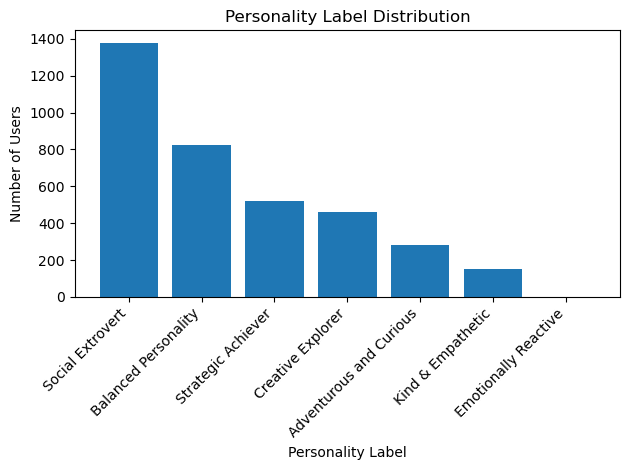

In [190]:
import matplotlib.pyplot as plt

label_counts = personality_table["personality_label"].value_counts()

plt.figure()
plt.bar(label_counts.index, label_counts.values)
plt.title("Personality Label Distribution")
plt.xlabel("Personality Label")
plt.ylabel("Number of Users")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()
